<a href="https://colab.research.google.com/github/veronica1908/RH_Entrega1/blob/main/d_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cargar librerías y paquetes

In [91]:
%pip install xgboost
!pip install import_ipynb
!pip install openpyxl

In [92]:
##Librerías

import pandas as pd
import numpy as np
import plotly as px
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn import datasets
from sklearn import tree
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRegressor
import import_ipynb
from sklearn.model_selection import cross_val_score
from sklearn import linear_model, tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, get_scorer_names, accuracy_score,confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler ## escalar variables

import joblib  ### para guardar modelos
import openpyxl
from sample_data import Funciones2 as funciones #para llamarlo en colab
#import Funciones2 as funciones # para llamarlo en visual Studio


#Conectar las bases y ajustarlas

In [93]:
df2016 = pd.read_csv('https://raw.githubusercontent.com/veronica1908/RH_Entrega1/main/dfdataN.csv', sep=',')
df2016

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,JobSatisfaction,WorkLifeBalance,DateSurvey,JobInvolvement,PerformanceRating,SurveyDate,Attrition,retirementDate,retirementType,resignationReason
0,51.0,Travel_Rarely,Sales,6.0,2,Life Sciences,1,1,Female,1,...,4.0,2.0,2016-12-31,3,3,2016-12-31,NaN,NaN,NaN,Others
1,31.0,Travel_Frequently,Research & Development,10.0,1,Life Sciences,1,2,Female,1,...,2.0,4.0,2016-12-31,2,4,2016-12-31,Yes,2016-10-15,Resignation,Others
2,32.0,Travel_Frequently,Research & Development,17.0,4,Other,1,3,Male,4,...,2.0,1.0,2016-12-31,3,3,2016-12-31,NaN,NaN,NaN,Others
3,38.0,Non-Travel,Research & Development,2.0,5,Life Sciences,1,4,Male,3,...,4.0,3.0,2016-12-31,2,3,2016-12-31,NaN,NaN,NaN,Others
4,32.0,Travel_Rarely,Research & Development,10.0,1,Medical,1,5,Male,1,...,1.0,3.0,2016-12-31,3,3,2016-12-31,NaN,NaN,NaN,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,29.0,Travel_Rarely,Sales,4.0,3,Other,1,4405,Female,2,...,4.0,3.0,2016-12-31,2,3,2016-12-31,NaN,NaN,NaN,Others
4296,42.0,Travel_Rarely,Research & Development,5.0,4,Medical,1,4406,Female,1,...,1.0,3.0,2016-12-31,3,3,2016-12-31,NaN,NaN,NaN,Others
4297,29.0,Travel_Rarely,Research & Development,2.0,4,Medical,1,4407,Male,1,...,4.0,3.0,2016-12-31,2,3,2016-12-31,NaN,NaN,NaN,Others
4298,25.0,Travel_Rarely,Research & Development,25.0,2,Life Sciences,1,4408,Male,2,...,3.0,3.0,2016-12-31,3,4,2016-12-31,NaN,NaN,NaN,Others


In [94]:
# llenar nulos de la variable respuesta
condicion = (df2016['retirementType'] == 'fired') | (pd.isnull(df2016['retirementType']))
df2016.loc[condicion, 'Attrition'] = 'No'

In [95]:
# eliminar variables que no se necesitan
df2016 = df2016.drop(['EmployeeID','retirementType','resignationReason','retirementDate','DateSurvey','SurveyDate','Over18','InfoDate'], axis=1)


In [96]:
#Observar si existen nulos
df2016.isnull().sum()

Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
Attrition                  0
dtype: int64

# Convertir a Dummies

In [97]:
df_dummies = df2016.copy()

In [98]:
# Identificar las columnas categóricas
cat_2016 = df_dummies.select_dtypes(include=['object']).columns

# Iterar a través de las columnas categóricas y mostrar las categorías únicas
for column in cat_2016:
    unique_categories = df_dummies[column].unique()
    print(f'Categorías en "{column}": {unique_categories}')

Categorías en "BusinessTravel": ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Categorías en "Department": ['Sales' 'Research & Development' 'Human Resources']
Categorías en "EducationField": ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Categorías en "Gender": ['Female' 'Male']
Categorías en "JobRole": ['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']
Categorías en "MaritalStatus": ['Married' 'Single' 'Divorced']
Categorías en "Attrition": ['No' 'Yes']


In [99]:
list_dummies = cat_2016.difference(['Gender', 'Attrition','retirementDate','DateSurvey','SurveyDate','Over18','InfoDate'])
list_dummies

Index(['BusinessTravel', 'Department', 'EducationField', 'JobRole',
       'MaritalStatus'],
      dtype='object')

In [100]:
# 2016
# Crear un objeto LabelEncoder
le = LabelEncoder()

# Iterar a través de las columnas categóricas y aplicar LabelEncoder si hay 2 categorías
for column in cat_2016:
    if len(df_dummies[column].unique()) == 2:  # Verificar si hay solo 2 categorías
       df_dummies[column] = le.fit_transform(df_dummies[column])

# Variables con mas de 2 categorias
df_dummies_2016 = pd.get_dummies(df_dummies)

In [101]:
df_dummies_2016

,Age,DistanceFromHome,Education,EmployeeCount,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,51.0,6.0,2,1,0,1,131160.0,1.0,11.0,8,...,0,0,0,0,0,0,0,0,1,0
1,31.0,10.0,1,1,0,1,41890.0,0.0,23.0,8,...,0,0,0,0,1,0,0,0,0,1
2,32.0,17.0,4,1,1,4,193280.0,1.0,15.0,8,...,0,0,0,0,0,1,0,0,1,0
3,38.0,2.0,5,1,1,3,83210.0,3.0,11.0,8,...,0,0,0,0,0,0,0,0,1,0
4,32.0,10.0,1,1,1,1,23420.0,4.0,12.0,8,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,29.0,4.0,3,1,0,2,35390.0,1.0,18.0,8,...,0,0,0,0,0,0,0,0,0,1
4296,42.0,5.0,4,1,0,1,60290.0,3.0,17.0,8,...,0,0,0,0,1,0,0,0,0,1
4297,29.0,2.0,4,1,1,1,26790.0,2.0,15.0,8,...,1,0,0,0,0,0,0,1,0,0
4298,25.0,25.0,2,1,1,2,37020.0,0.0,20.0,8,...,0,0,0,0,0,1,0,0,1,0


#Escalado y/o estandarización de los datos

In [102]:
######## con base en los modelos candidatos se realizará una selección de variables ########
y = df_dummies_2016['Attrition']
X1 = df_dummies_2016.loc[:, ~df_dummies_2016.columns.isin(['Attrition'])]
scaler=StandardScaler()
scaler.fit(X1)
X2=scaler.transform(X1)
X=pd.DataFrame(X2,columns=X1.columns)

#Árbol de decisión

|--- TotalWorkingYears <= -1.26
|   |--- BusinessTravel_Travel_Frequently <= 0.80
|   |   |--- Age <= -1.14
|   |   |   |--- class: 1
|   |   |--- Age >  -1.14
|   |   |   |--- class: 0
|   |--- BusinessTravel_Travel_Frequently >  0.80
|   |   |--- EducationField_Marketing <= 1.25
|   |   |   |--- class: 1
|   |   |--- EducationField_Marketing >  1.25
|   |   |   |--- class: 0
|--- TotalWorkingYears >  -1.26
|   |--- MaritalStatus_Single <= 0.38
|   |   |--- NumCompaniesWorked <= 0.73
|   |   |   |--- class: 0
|   |   |--- NumCompaniesWorked >  0.73
|   |   |   |--- class: 0
|   |--- MaritalStatus_Single >  0.38
|   |   |--- Age <= -0.37
|   |   |   |--- class: 0
|   |   |--- Age >  -0.37
|   |   |   |--- class: 0



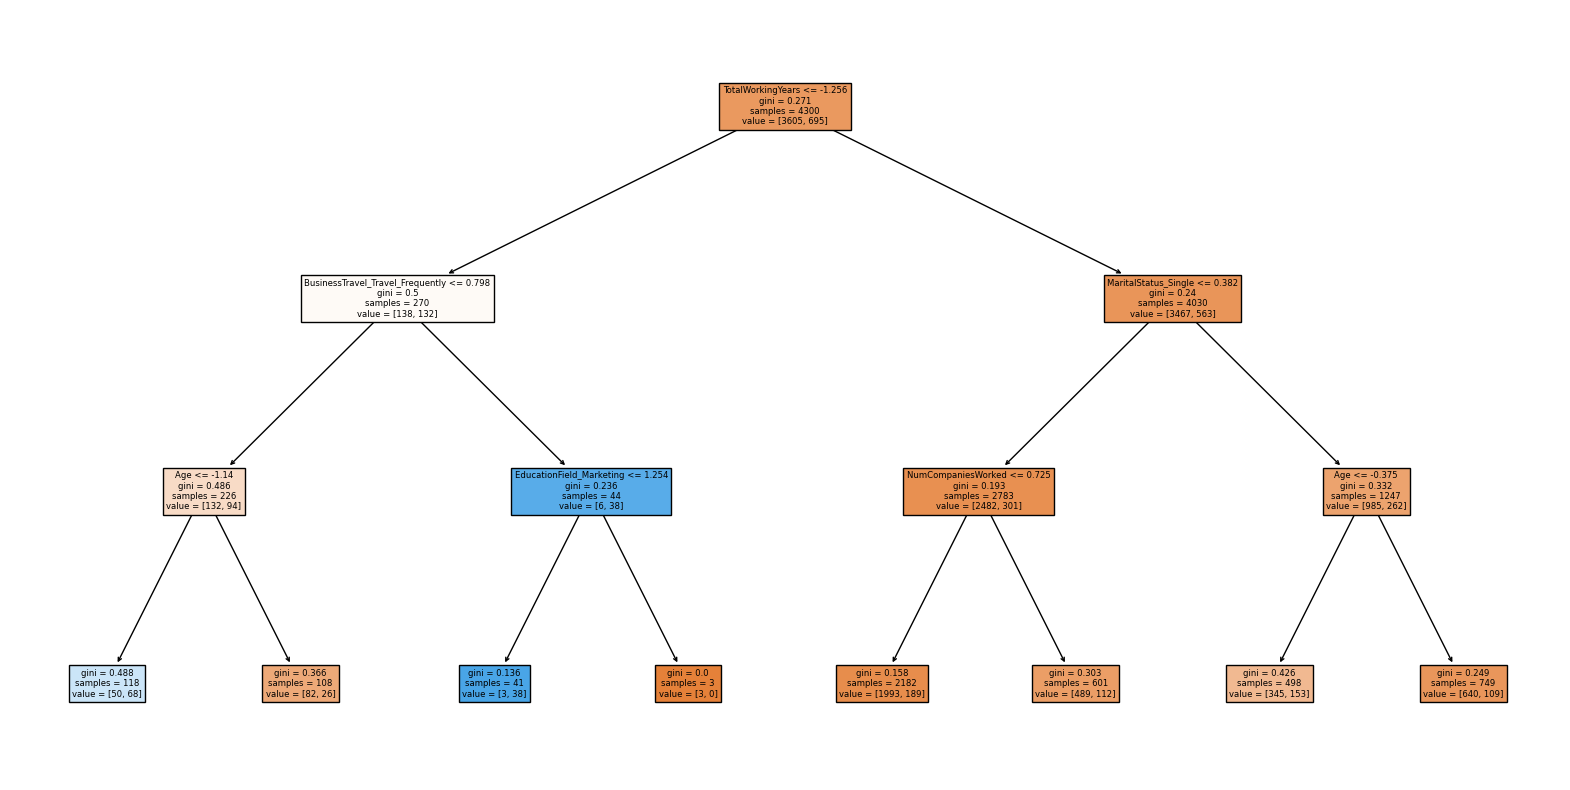

In [103]:
# Crear y entrenar el modelo de árbol de decisión
rtree = DecisionTreeClassifier(max_depth=3)
rtree.fit(X=X, y=y)

# Generar una representación de texto del árbol de decisión
tree_text = export_text(rtree, feature_names=X.columns.tolist())
print(tree_text)

# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(rtree, feature_names=X.columns.tolist(), filled=True)
plt.show()

#Modelos candidatos

In [104]:
# Define los modelos seleccionados
m_logreg = LogisticRegression()
m_tree = DecisionTreeClassifier()
m_rf = RandomForestClassifier()
m_gbt = GradientBoostingClassifier()

# Lista de modelos seleccionados
modelos=list([m_logreg,m_tree, m_rf, m_gbt])


#Selección de variables

In [105]:
# Ahora, utiliza estos modelos para seleccionar las variables
var_names = funciones.sel_variables(modelos, X, y, threshold="2*mean")
X2=X[var_names] ### matriz con variables seleccionadas
X2.info()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4300 entries, 0 to 4299
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               4300 non-null   float64
 1   BusinessTravel_Travel_Frequently  4300 non-null   float64
 2   DistanceFromHome                  4300 non-null   float64
 3   EnvironmentSatisfaction           4300 non-null   float64
 4   JobSatisfaction                   4300 non-null   float64
 5   MaritalStatus_Single              4300 non-null   float64
 6   MonthlyIncome                     4300 non-null   float64
 7   NumCompaniesWorked                4300 non-null   float64
 8   PercentSalaryHike                 4300 non-null   float64
 9   TotalWorkingYears                 4300 non-null   float64
 10  YearsAtCompany                    4300 non-null   float64
 11  YearsSinceLastPromotion           4300 non-null   float64
 12  YearsW

#Definir modelo ganador

In [106]:
# Calcular AUC-ROC para todos los modelos con todas las variables
f1score_df = funciones.medir_modelos(modelos, "f1", X, y, 30)
# Calcular AUC-ROC para todos los modelos con variables seleccionadas
f1_score_varsel = funciones.medir_modelos(modelos, "f1", X2, y, 30)

In [107]:
f1=pd.concat([f1score_df,f1_score_varsel],axis=1)
f1.columns=['rlog', 'dt', 'rf', 'gb', 'rlog_Sel', 'dt_sel', 'rf_sel', 'gb_Sel']
f1

,rlog,dt,rf,gb,rlog_Sel,dt_sel,rf_sel,gb_Sel
0,0.322581,1.000000,1.000000,0.571429,0.222222,1.000000,1.000000,0.529412
1,0.413793,1.000000,1.000000,0.571429,0.296296,1.000000,1.000000,0.555556
2,0.076923,1.000000,1.000000,0.529412,0.153846,1.000000,1.000000,0.400000
3,0.266667,1.000000,1.000000,0.466667,0.357143,1.000000,1.000000,0.516129
4,0.222222,1.000000,1.000000,0.466667,0.160000,1.000000,1.000000,0.437500
5,0.187500,1.000000,1.000000,0.529412,0.333333,1.000000,1.000000,0.628571
6,0.333333,1.000000,1.000000,0.500000,0.142857,1.000000,1.000000,0.545455
7,0.275862,1.000000,1.000000,0.451613,0.153846,1.000000,1.000000,0.451613
8,0.133333,1.000000,1.000000,0.333333,0.000000,1.000000,1.000000,0.285714
9,0.258065,1.000000,1.000000,0.344828,0.137931,1.000000,1.000000,0.387097


<Axes: >

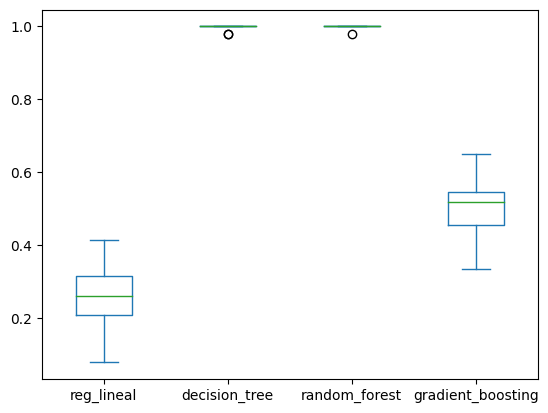

In [108]:
f1score_df.plot(kind='box') #### gráfico para modelos todas las variables

<Axes: >

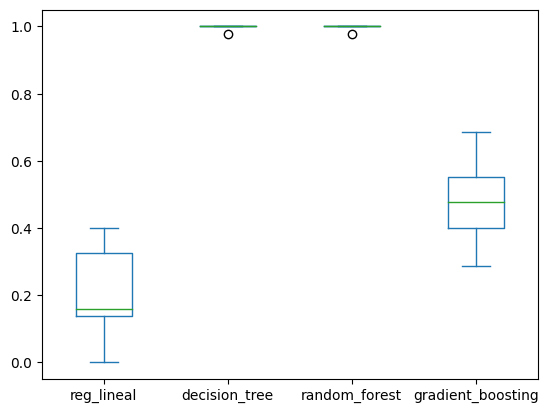

In [109]:
f1_score_varsel.plot(kind='box') ### gráfico para modelo variables seleccionadas

<Axes: >

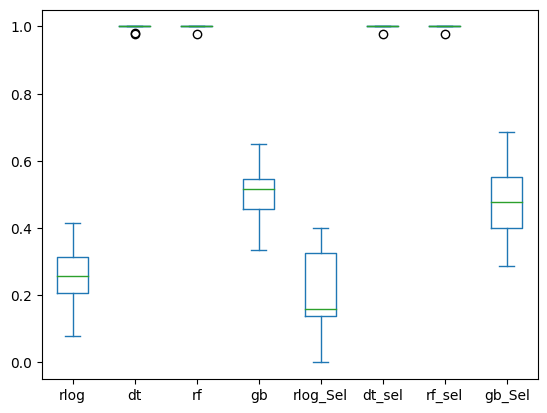

In [110]:
f1.plot(kind='box') ### gráfico para modelos sel y todas las variables

In [111]:
f1.mean()

rlog        0.255266
dt          0.998550
rf          0.999259
gb          0.496394
rlog_Sel    0.200002
dt_sel      0.999259
rf_sel      0.999259
gb_Sel      0.480975
dtype: float64


Dado el contexto de abordar una problemática de clasificación caracterizada por un desequilibrio en las clases y tomando en cuenta los desafíos empresariales asociados con la alta tasa de salidas de empleados, se plantea la necesidad de un modelo capaz de armonizar la precisión y la exhaustividad en la predicción de estas salidas. Tanto los modelos de Random Forest como los de Decision Tree han emergido como alternativas efectivas en este escenario, al ofrecer un equilibrio óptimo entre precisión y exhaustividad, lo cual se refleja en sus destacados puntajes de F1 score.

Así mismo, se contempla el modelo con variables seleccionadas debido a su desempeño equiparable al del modelo que considera todas las variables. Esta estrategia permite simplificar la estructura del modelo y reducir el costo computacional sin menoscabar de manera significativa la capacidad predictiva. Al tener como meta identificar las variables más influyentes en la tasa de salidas y prever con exactitud las salidas de los empleados, este enfoque se presenta como una solución eficaz y eficiente para atender los desafíos empresariales planteados.

Por último, se procederá a entrenar el modelo Random Forest con las variables seleccionadas, cerrando así el ciclo de acción previsto

#Afinamiento de hiperparámetros

##Decision Tree

In [112]:
# Grilla de hiperparametros para el modelo Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],  # Criterios para la división de nodos
    'max_depth': [5, 10, 15],     # Profundidad máxima del árbol
    'min_samples_split': [5, 20, 100 ],    # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4],      # Número mínimo de muestras requeridas en un nodo hoja
    'max_features': [5, 20],  # Número máximo de características a considerar en cada división
    'class_weight': [None, 'balanced']  # Peso de las clases para abordar el desbalance de clases
}

In [113]:
# Grilla de hiperparametros para el modelo Ramdon Forest
param_grid_rf = {
    'n_estimators': [5, 50, 100, 200, 500],  # Número de árboles en el bosque
    'max_features': [5, 20],  # Número de características a considerar en cada división
    'max_depth': [10, 20, 30],  # Profundidad máxima del árbol
    'min_samples_split': [5, 20, 100],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras requeridas para estar en un nodo hoja
    'bootstrap': [True, False]  # Método de muestreo para construir árboles
}


In [114]:
# Crear la instancia de GridSearchCV para búsqueda de hiperparámetros
tun_dt = GridSearchCV(m_tree, param_grid=param_grid_dt, scoring='f1', cv=5)
# Realizar la búsqueda de hiperparámetros en los datos
tun_dt.fit(X2, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15], 'max_features': [5, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [5, 20, 100]},
             scoring='f1')

In [115]:
pd.set_option('display.max_colwidth', 100)
resultados=tun_dt.cv_results_
tun_dt.best_params_
pd_resultados=pd.DataFrame(resultados)
pd_resultados[["params","mean_test_score"]].sort_values(by="mean_test_score", ascending=False)


,params,mean_test_score
45,"{'class_weight': None, 'criterion': 'gini', 'max_depth': 15, 'max_features': 20, 'min_samples_le...",0.949821
153,"{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 15, 'max_features': 20, 'min_samp...",0.948763
156,"{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 15, 'max_features': 20, 'min_samp...",0.945615
48,"{'class_weight': None, 'criterion': 'gini', 'max_depth': 15, 'max_features': 20, 'min_samples_le...",0.936118
99,"{'class_weight': None, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 20, 'min_samples...",0.930530
...,...,...
60,"{'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 5, 'min_samples_l...",0.331831
61,"{'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 5, 'min_samples_l...",0.330439
8,"{'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 5, 'min_samples_leaf...",0.330303
6,"{'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 5, 'min_samples_leaf...",0.322736


In [116]:
# Mejor grilla del modelo Decision Tree
dt_final = tun_dt.best_estimator_

##Random Forest

In [117]:
# Técnica de búsqueda de hiperparámetros
tun_rf = RandomizedSearchCV(m_rf,param_distributions=param_grid_rf,n_iter=6,scoring="f1")
tun_rf.fit(X2,y)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=6,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30],
                                        'max_features': [5, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [5, 20, 100],
                                        'n_estimators': [5, 50, 100, 200, 500]},
                   scoring='f1')

In [118]:
pd.set_option('display.max_colwidth', 100)
resultados=tun_rf.cv_results_
tun_rf.best_params_
pd_resultados=pd.DataFrame(resultados)
pd_resultados[["params","mean_test_score"]].sort_values(by="mean_test_score", ascending=False)

,params,mean_test_score
4,"{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 5, 'max_dep...",0.999278
1,"{'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 5, 'max_dep...",0.997101
3,"{'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 20, 'max_de...",0.956318
5,"{'n_estimators': 200, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 5, 'max_de...",0.880179
2,"{'n_estimators': 500, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 20, 'max_d...",0.636125
0,"{'n_estimators': 50, 'min_samples_split': 100, 'min_samples_leaf': 1, 'max_features': 20, 'max_d...",0.321973


In [119]:
# Guardar el modelo con hyperparameter tunning
rf_final = tun_rf.best_estimator_


##Análisis de los modelos Decision Tree y Ramdon Forest

In [120]:
#####Evaluar métrica de entrenamiento y evaluación para mirar sobre ajuste ####
eval_dt=cross_validate(dt_final,X2,y,cv=30,scoring="f1",return_train_score=True)
eval_rf=cross_validate(rf_final,X2,y,cv=30,scoring="f1",return_train_score=True)

In [121]:
#### convertir resultado de evaluacion entrenamiento y evaluacion en data frame para Desicion Tree
train_dt=pd.DataFrame(eval_dt['train_score'])
test_dt=pd.DataFrame(eval_dt['test_score'])
train_test_dt=pd.concat([train_dt, test_dt],axis=1)
train_test_dt.columns=['train_score','test_score']
train_test_dt

,train_score,test_score
0,0.966309,0.977778
1,0.987189,0.977778
2,0.982642,0.933333
3,0.994780,0.978723
4,0.975610,0.930233
5,0.974790,0.956522
6,0.983333,1.000000
7,0.990977,0.956522
8,0.954268,0.956522
9,0.972435,0.956522


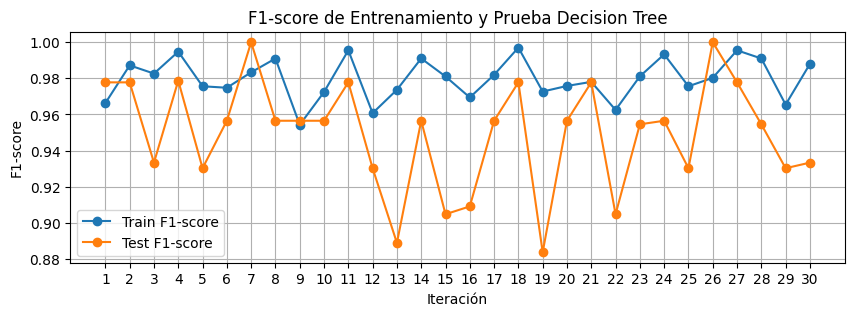

In [122]:
# Número de iteraciones
iterations = range(1, len(train_test_dt) + 1)

# Crear el gráfico de líneas
plt.figure(figsize=(10, 3))
plt.plot(iterations, train_test_dt['train_score'], marker='o', label='Train F1-score')
plt.plot(iterations, train_test_dt['test_score'], marker='o', label='Test F1-score')
plt.title('F1-score de Entrenamiento y Prueba Decision Tree')
plt.xlabel('Iteración')
plt.ylabel('F1-score')
plt.xticks(iterations)
plt.legend()
plt.grid(True)
plt.show()

In [123]:
train_test_dt["test_score"].mean()

0.949515877667245

Después del afinamiento y entrenamiento, el puntaje disminuye, lo que indicaría que no es necesario este ajuste, ya que el puntaje inicial es superior al 99%.

In [124]:
#### convertir resultado de evaluacion entrenamiento y evaluacion en data frame para Ramdon Forest
train_rf=pd.DataFrame(eval_rf['train_score'])
test_rf=pd.DataFrame(eval_rf['test_score'])
train_test_rf=pd.concat([train_rf, test_rf],axis=1)
train_test_rf.columns=['train_score','test_score']
train_test_rf

,train_score,test_score
0,1.0,1.000000
1,1.0,1.000000
2,1.0,1.000000
3,1.0,1.000000
4,1.0,1.000000
5,1.0,1.000000
6,1.0,1.000000
7,1.0,1.000000
8,1.0,1.000000
9,1.0,1.000000


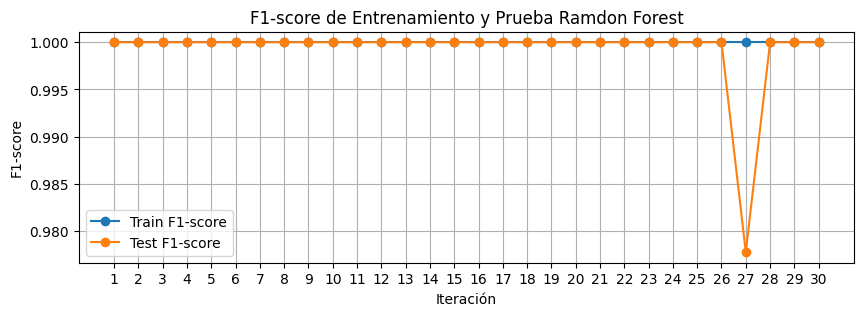

In [125]:
# Número de iteraciones
iterations = range(1, len(train_test_rf) + 1)

# Crear el gráfico de líneas
plt.figure(figsize=(10, 3))
plt.plot(iterations, train_test_rf['train_score'], marker='o', label='Train F1-score')
plt.plot(iterations, train_test_rf['test_score'], marker='o', label='Test F1-score')
plt.title('F1-score de Entrenamiento y Prueba Ramdon Forest')
plt.xlabel('Iteración')
plt.ylabel('F1-score')
plt.xticks(iterations)
plt.legend()
plt.grid(True)
plt.show()

In [126]:
train_test_rf["test_score"].mean()

0.9992592592592593

Este resultado es similar al obtenido antes del afinamiento de hiperparámetros y entrenamiento, lo que indica que el modelo es bastante bueno con la base de datos proporcionada, por lo tanto no sería realmente necesario el afinamiento. Nos quedamos entonces con este modelo, dado que tiene mejor puntaje.

Procedemos a elaborar la matriz de confusión para el modelo Random Forest

In [127]:
# separar datos de train y test
x_train,x_test,y_train,y_test = train_test_split(X2,y,shuffle = True,test_size=0.30, random_state=123)

In [128]:
y_pred_train_dt = dt_final.predict(x_train) # guardar la predicción para train
y_pred_test_dt = dt_final.predict(x_test) # guardar la predicción para test

[[1073    0]
 [  13  204]]


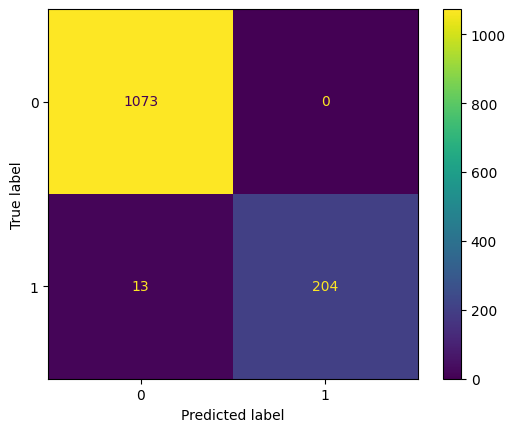

In [129]:
# Matriz de confusión:
cm = confusion_matrix(y_test, y_pred_test_dt, labels=dt_final.classes_) # guardar las clases para la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt_final.classes_)
disp.plot();
print(cm)

De esta matriz obtenenemos lo siguiente:
Verdaderos positivos (TP): 1073 muestras fueron clasificadas correctamente como positivas.
Falsos negativos (FN): Aquí, no hay falsos negativos, lo que significa que el modelo no clasificó erróneamente ninguna muestra que debería haber sido positiva.
Falsos positivos (FP): El modelo  clasificó erróneamente 13 muestras que deberían haber sido negativa.
Verdaderos negativos (TN): Aquí, 204 muestras fueron clasificadas correctamente como negativas (Verdaderos No Retiros).

En general, el modelo tiene un comportamiento bastante bueno para la predicción.


In [130]:
TP=cm[0,0]
FP=cm[1,0]
FN=cm[0,1]
TN=cm[1,1]

print(f"Accuracy test: {accuracy_score(y_test, y_pred_test_dt)}")
print(f'Precicion: {TP/(TP+FP)}')
print(f'Recuperacion (Sensibilidad)): {TP/(TP+FN)}')
print(f'F1-score:', f1_score(y_test, y_pred_test_dt, average='binary'))
print(f'Especificidad: {TN/(FP+TN)}')

Accuracy test: 0.9899224806201551
Precicion: 0.9880294659300184
Recuperacion (Sensibilidad)): 1.0
F1-score: 0.9691211401425179
Especificidad: 0.9400921658986175
